 Please enter the function to find root using Newton-Raphson Method 


 x**3 - 0.165*(x**2) + 3.993E-4


 Please input the initial guess for finding the root 


 0.1


Enter the number of iterations


 10


Enter the max error tolerance


 0.1


   Iterations    X(i-1)        Xi      Error(%)         F(Xi)
0           1  0.100000  0.016433           NaN  3.591789e-04
1           2  0.016433  0.094298  8.257305e+01 -2.293920e-04
2           3  0.094298  0.042656  1.210688e+02  1.766936e-04
3           4  0.042656  0.063159  3.246289e+01 -6.948791e-06
4           5  0.063159  0.062376  1.255189e+00  1.452399e-08
5           6  0.062376  0.062378  2.612719e-03  5.877780e-14
6           7  0.062378  0.062378  1.057361e-08  1.084202e-19
7           8  0.062378  0.062378  2.224804e-14  0.000000e+00
8           9  0.062378  0.062378  0.000000e+00  0.000000e+00
9          10  0.062378  0.062378  0.000000e+00  0.000000e+00
The Root is 0.06237758151374951 with error 0.0


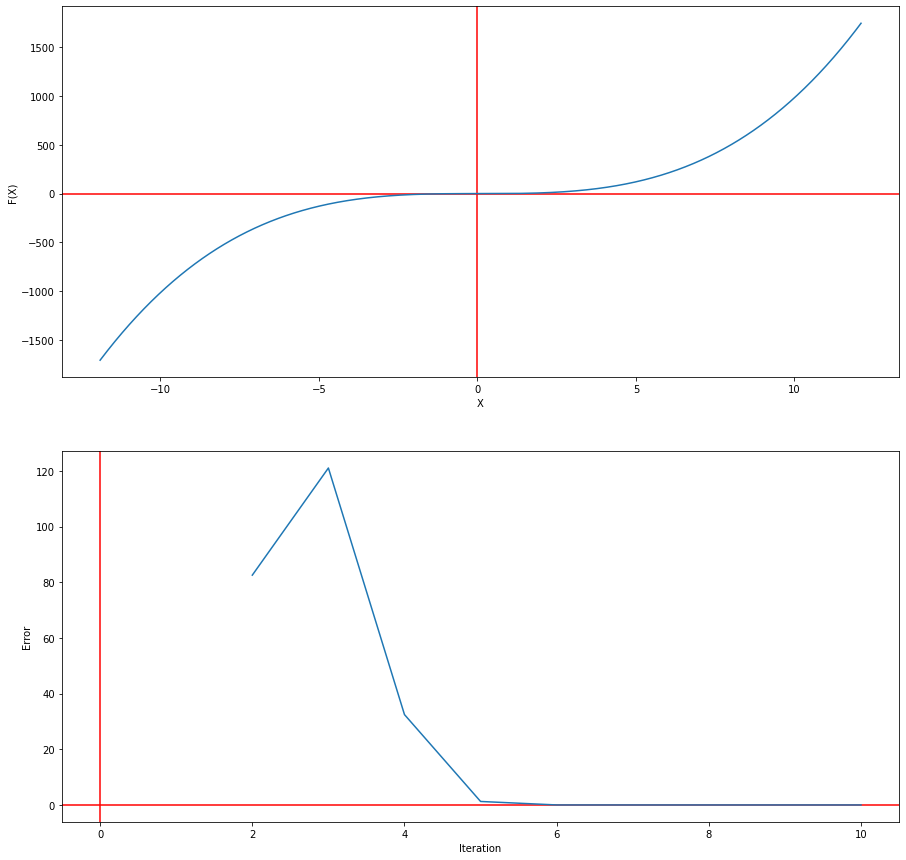

In [1]:
## 2019331076
#Bisection Method
#remove comment if not installed the required modules in your pc
#!pip install matplotlib
#!pip install pandas
#!pip install numpy
#!pip install prettytable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sympy import *
from prettytable import PrettyTable




def f(x, func):
    val = eval(func)
    return val

def countSignificantDigits(x):
    return int(2-math.log10(x*2))


def bisection(func, l, r, iterations, error_tolerance):
    cnt = 1
    prev_val = (l+r)/2.0
    xm = -1
    error = 0    
    error_list = []
    Iteration_list=[]
    Xu = []
    Xl=[]
    Xm=[]
    func_list=[]
    ll = l
    rr = r
    significat_digit=[]
    

    while cnt <= iterations:
        cnt = cnt + 1
        xm = (l+r)/2.0
        new_val = f(xm, func)
        
        Xl.append(l)
        Xu.append(r)
        Xm.append(xm)
        Iteration_list.append((cnt-1))
        func_list.append(new_val)

        if (cnt == 2):

            
            
            error_list.append(np.nan)
            significat_digit.append(np.nan)
            

        else:
            error = abs(xm - prev_val) / abs(xm * 1.00)
            error = error * 100.0
            error_list.append(error)
            significat_digit.append(countSignificantDigits(error))
            
            
        prev_val = xm    
            
            

        if ((f(xm, func) * f(l, func)) < 0):
            r = xm
        else:
            l = xm
    #data_table = pd.DataFrame({"Iteration":Iteration_list, "Xl":Xl, "Xu":Xu, "Xm":Xm, "Error(%)":error_list, "f(Xm)":func_list,"Significant_Digit":significat_digit})
    data = PrettyTable()
    data.add_column("Iteration",Iteration_list)
    data.add_column("Xl",Xl)
    data.add_column("Xu",Xu)
    data.add_column("Xm",Xm)
    data.add_column("Error(%)",error_list)
    data.add_column("f(Xm)",func_list)
    data.add_column("Significant_Digit",significat_digit)

    
    print(data)
    #data_table.set_index("Iteration")
    #print(data_table)
    print("The Root is "+ str(xm) + " with error "+str(error))
    if(error>error_tolerance):
        print("Can't get accurate result you wanted due to iteration limitations")
    
    
    x=[]
    y=[]
    if ll>rr:
        tmp = rr
        rr = ll
        ll=tmp
    while ll<=rr:
        x.append(ll)
        y.append(f(ll,func))
        ll = ll + 0.01
        
    
    x=np.array(x)
    y=np.array(y)
    plt.figure(figsize=(15,15))
    plt.subplot(2,1,1)
    plt.xlabel("X")
    plt.ylabel("F(X)")
    plt.axhline(y = 0.0, color = 'r', linestyle = '-')
    plt.axvline(x=0.0,color='r')
    plt.plot(x,y)
    x=np.array(Iteration_list)
    y=np.array(error_list)
    plt.subplot(2,1,2)
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.axhline(y = 0.0, color = 'r', linestyle = '-')
    plt.axvline(x=0.0,color='r')
    plt.plot(x,y)
    



print(" Please enter the function to find root using Bisection Method ")
func = input()

while True:
    print(" Please input the lower limit for finding the root ")
    a = input()
    a = float(a)
    print(" Please input the upper limit for finding the root ")
    b = input()
    b = float(b)
    print("Enter the number of iterations")
    iterations = int(input())
    print("Enter the max error tolerance")
    error_tolerance = float(input())

    if (f(a, func) * f(b, func) < 0):
        bisection(func, a, b, iterations, error_tolerance)
        break
    else:
        print("Not a valid range")

